In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values


# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    #filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '../../dataset/UCI_HAR/UCI HAR Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '../../dataset/UCI_HAR/UCI HAR Dataset/')
    
    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    #one hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [2]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

(7352, 128, 6) (7352, 1) (7352, 6) (2947, 128, 6) (2947, 1) (2947, 6)


In [3]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 6)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 6)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [4]:
print("0: Walking:" ,np.where(trainy == 0)[0].size)
print("1: WU:" ,np.where(trainy == 1)[0].size)
print("2: WD:" ,np.where(trainy == 2)[0].size)
print("3: Sitting:" ,np.where(trainy == 3)[0].size)
print("4: Standing:" ,np.where(trainy == 4)[0].size)
print("5: Laying:" ,np.where(trainy == 5)[0].size)

0: Walking: 1226
1: WU: 1073
2: WD: 986
3: Sitting: 1286
4: Standing: 1374
5: Laying: 1407


In [5]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)   

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [6]:
X_train_all = trainX   # at this stage, the data includes both dynamic and static HAR data
y_train_all = trainy

X_test_all = testX
y_test_all = testy

In [7]:
import random

static_2 = np.where(trainy  == 0)[0]
static_3 = np.where(trainy == 1)[0]
static_4 = np.where(trainy  == 2)[0]

dynamic_3 = np.where(trainy == 3)[0]
dynamic_4 = np.where(trainy == 4)[0]
dynamic_5 = np.where(trainy == 5)[0]

static = np.concatenate([static_2, static_3, static_4])
static_list = static.tolist()

dynamic = np.concatenate([dynamic_3, dynamic_4, dynamic_5])
dynamic_list = dynamic.tolist()

# Shuffle dynamic data index
r = random.random()
random.shuffle(static_list, lambda: r)
random.shuffle(dynamic_list, lambda: r)

static = np.array(static_list)
dynamic = np.array(dynamic_list)

trainX_static = X_train_all[static]
trainy_static = y_train_all[static]

trainX_dynamic = X_train_all[dynamic]
trainy_dynamic = y_train_all[dynamic]

trainX_combined = X_train_all
trainy_combined = y_train_all

/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_81735/1208802571.py:19: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(static_list, lambda: r)
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_81735/1208802571.py:20: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(dynamic_list, lambda: r)


In [8]:
static_2 = np.where(testy == 0)[0]
static_3 = np.where(testy == 1)[0]
static_4 = np.where(testy == 2)[0]
static = np.concatenate([static_2, static_3, static_4])
static_list = static.tolist()

dynamic_3 = np.where(testy == 3)[0]
dynamic_4 = np.where(testy == 4)[0]
dynamic_5 = np.where(testy == 5)[0]
dynamic = np.concatenate([dynamic_3, dynamic_4, dynamic_5])
dynamic_list = dynamic.tolist()

r = random.random()
random.shuffle(static_list, lambda: r)
random.shuffle(dynamic_list, lambda: r)

static = np.array(static_list)
dynamic = np.array(dynamic_list)

testX_static = X_test_all[static]
testy_static = y_test_all[static]

testX_dynamic = X_test_all[dynamic]
testy_dynamic = y_test_all[dynamic]

testX_combined = X_test_all
testy_combined = y_test_all

/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_81735/3041243064.py:14: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(static_list, lambda: r)
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_81735/3041243064.py:15: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(dynamic_list, lambda: r)


In [9]:
print("Train 0_s: Walking:" ,np.where(testy_static == 0)[0].size)
print("Train1_s: WU:" ,np.where(testy_static == 1)[0].size)
print("Train2_s: WD:" ,np.where(testy_static == 2)[0].size)
print("Train3_s: Sitting:" ,np.where(testy_static == 3)[0].size)
print("Train4_s: Standing:" ,np.where(testy_static == 4)[0].size)
print("Train5_s: Laying:" ,np.where(testy_static == 5)[0].size) 

print("Test 0_s: Walking:" ,np.where(trainy_static == 0)[0].size)
print("Test 1_s: WU:" ,np.where(trainy_static == 1)[0].size)
print("Test 2_s: WD:" ,np.where(trainy_static == 2)[0].size)
print("Test 3_s: Sitting:" ,np.where(trainy_static == 3)[0].size)
print("Test 4_s: Standing:" ,np.where(trainy_static == 4)[0].size)
print("Test 5_s: Laying:" ,np.where(trainy_static == 5)[0].size) 

Train 0_s: Walking: 496
Train1_s: WU: 471
Train2_s: WD: 420
Train3_s: Sitting: 0
Train4_s: Standing: 0
Train5_s: Laying: 0
Test 0_s: Walking: 1226
Test 1_s: WU: 1073
Test 2_s: WD: 986
Test 3_s: Sitting: 0
Test 4_s: Standing: 0
Test 5_s: Laying: 0


In [10]:
print("Train 0_d: Walking:" ,np.where(testy_dynamic == 0)[0].size)
print("Train1_d: WU:" ,np.where(testy_dynamic == 1)[0].size)
print("Train2_d: WD:" ,np.where(testy_dynamic == 2)[0].size)
print("Train3_d: Sitting:" ,np.where(testy_dynamic == 3)[0].size)
print("Train4_d: Standing:" ,np.where(testy_dynamic == 4)[0].size)
print("Train5_d: Laying:" ,np.where(testy_dynamic == 5)[0].size) 

print("Test 0_d: Walking:" ,np.where(trainy_dynamic == 0)[0].size)
print("Test 1_d: WU:" ,np.where(trainy_dynamic == 1)[0].size)
print("Test 2_d: WD:" ,np.where(trainy_dynamic == 2)[0].size)
print("Test 3_d: Sitting:" ,np.where(trainy_dynamic == 3)[0].size)
print("Test 4_d: Standing:" ,np.where(trainy_dynamic == 4)[0].size)
print("Test 5_d: Laying:" ,np.where(trainy_dynamic == 5)[0].size) 

Train 0_d: Walking: 0
Train1_d: WU: 0
Train2_d: WD: 0
Train3_d: Sitting: 491
Train4_d: Standing: 532
Train5_d: Laying: 537
Test 0_d: Walking: 0
Test 1_d: WU: 0
Test 2_d: WD: 0
Test 3_d: Sitting: 1286
Test 4_d: Standing: 1374
Test 5_d: Laying: 1407


In [11]:
trainy_static_one_hot = to_categorical(trainy_static)
testy_static_one_hot = to_categorical(testy_static)

trainy_dynamic_one_hot = to_categorical(trainy_dynamic)
testy_dynamic_one_hot = to_categorical(testy_dynamic)

trainy_combined_one_hot = to_categorical(trainy)
testy_combined_one_hot = to_categorical(testy)

In [12]:
print("X train shape: ", trainX_static.shape)
print("Y train shape: ", trainy_static.shape)
print("Y train One hot shape: ", trainy_static_one_hot.shape)
print("X test shape: ", testX_static.shape)
print("Y test shape: ", testy_static.shape)
print("Y test One hot shape: ", testy_static_one_hot.shape)

X train shape:  (3285, 128, 6)
Y train shape:  (3285, 1)
Y train One hot shape:  (3285, 3)
X test shape:  (1387, 128, 6)
Y test shape:  (1387, 1)
Y test One hot shape:  (1387, 3)


In [13]:
print("X train shape: ", trainX_dynamic.shape)
print("Y train shape: ", trainy_dynamic.shape)
print("Y train One hot shape: ", trainy_dynamic_one_hot.shape)
print("X test shape: ", testX_dynamic.shape)
print("Y test shape: ", testy_dynamic.shape)
print("Y test One hot shape: ", testy_dynamic_one_hot.shape)

X train shape:  (4067, 128, 6)
Y train shape:  (4067, 1)
Y train One hot shape:  (4067, 6)
X test shape:  (1560, 128, 6)
Y test shape:  (1560, 1)
Y test One hot shape:  (1560, 6)


In [14]:
print("X train shape: ", trainX_combined.shape)
print("Y train shape: ", trainy_combined.shape)
print("Y train One hot shape: ", trainy_combined_one_hot.shape)
print("X test shape: ", testX_combined.shape)
print("Y test shape: ", testy_combined.shape)
print("Y test One hot shape: ", testy_combined_one_hot.shape)

X train shape:  (7352, 128, 6)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 6)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [15]:
unique, counts = np.unique(trainy_static, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy_static, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]]


In [16]:
unique, counts = np.unique(trainy_dynamic, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy_dynamic, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[[   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  3 491]
 [  4 532]
 [  5 537]]


In [17]:
unique, counts = np.unique(trainy_combined, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy_combined, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [18]:
from sklearn.model_selection import train_test_split

X_train_static,X_val_static,y_train_static_one_hot,y_val_static_one_hot,y_train_static,y_val_static=train_test_split(trainX_static, trainy_static_one_hot, trainy_static,test_size=0.2,random_state=100)

In [19]:
from sklearn.model_selection import train_test_split

X_train_dynamic,X_val_dynamic,y_train_dynamic_one_hot,y_val_dynamic_one_hot,y_train_dynamic,y_val_dynamic=train_test_split(trainX_dynamic, trainy_dynamic_one_hot, trainy_dynamic,test_size=0.2,random_state=100)

In [20]:
from sklearn.model_selection import train_test_split

X_train_combined,X_val_combined,y_train_combined_one_hot,y_val_combined_one_hot,y_train_combined,y_val_combined=train_test_split(trainX_combined, trainy_combined_one_hot, trainy_combined,test_size=0.2,random_state=100)

In [21]:
X_train_combined.shape, y_train_combined.shape, testX_combined.shape, testy_combined.shape

((5881, 128, 6), (5881, 1), (2947, 128, 6), (2947, 1))

In [22]:
n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic = X_train_dynamic.shape[1], X_train_dynamic.shape[2], testy_dynamic_one_hot.shape[1]


In [23]:
n_timesteps_static, n_features_static, n_outputs_static = X_train_static.shape[1], X_train_static.shape[2], testy_static_one_hot.shape[1]


In [24]:
n_timesteps_combined, n_features_combined, n_outputs_combined = X_train_combined.shape[1], X_train_combined.shape[2], testy_combined_one_hot.shape[1]


In [25]:
n_timesteps_static, n_features_static, n_outputs_static, n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic, n_timesteps_combined, n_features_combined, n_features_combined

(128, 6, 3, 128, 6, 6, 128, 6, 6)

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D
from tensorflow.keras.layers import concatenate
from keras.utils import to_categorical

# Model

In [27]:
def model_LSTM(n_timesteps, n_features, n_outputs):
    model = Sequential([
        LSTM(32, input_shape=(n_timesteps, n_features)),
        Dropout(0.5),
        Dense(n_outputs, activation='softmax')
    ])

    return model

# Static

In [28]:
X_train_static.shape, y_train_static_one_hot.shape, X_val_static.shape, y_val_static_one_hot.shape

((2628, 128, 6), (2628, 3), (657, 128, 6), (657, 3))

In [29]:
model_static = model_LSTM(n_timesteps_static, n_features_static, n_outputs_static)
model_static.summary()

model_static.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4992      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 5,091
Trainable params: 5,091
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit network
history_static = model_static.fit(X_train_static, y_train_static_one_hot, epochs=100, batch_size=32, validation_data=(X_val_static, y_val_static_one_hot))

Epoch 1/100
83/83 [==============================] - 4s 30ms/step - loss: 1.0807 - accuracy: 0.3957 - val_loss: 0.9758 - val_accuracy: 0.4734
Epoch 2/100
83/83 [==============================] - 2s 25ms/step - loss: 0.9517 - accuracy: 0.5240 - val_loss: 0.8888 - val_accuracy: 0.5312
Epoch 3/100
83/83 [==============================] - 2s 26ms/step - loss: 0.8358 - accuracy: 0.5967 - val_loss: 0.6422 - val_accuracy: 0.7458
Epoch 4/100
83/83 [==============================] - 2s 24ms/step - loss: 0.5844 - accuracy: 0.7321 - val_loss: 0.7547 - val_accuracy: 0.7382
Epoch 5/100
83/83 [==============================] - 2s 24ms/step - loss: 0.5303 - accuracy: 0.7987 - val_loss: 0.4315 - val_accuracy: 0.8569
Epoch 6/100
83/83 [==============================] - 2s 24ms/step - loss: 0.6262 - accuracy: 0.7367 - val_loss: 0.5587 - val_accuracy: 0.7230
Epoch 7/100
83/83 [==============================] - 2s 24ms/step - loss: 0.5964 - accuracy: 0.7112 - val_loss: 0.5917 - val_accuracy: 0.7458
Epoch 

# Dynamic

In [31]:
LSTM_model_dynamic = model_LSTM(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic)

LSTM_model_dynamic.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
LSTM_model_dynamic.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4992      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 5,190
Trainable params: 5,190
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fit network
history_dynamic=LSTM_model_dynamic.fit(x=X_train_dynamic, y=y_train_dynamic_one_hot, epochs=100, batch_size=32,validation_data=(X_val_dynamic, y_val_dynamic_one_hot))

Epoch 1/100
102/102 [==============================] - 4s 31ms/step - loss: 0.9260 - accuracy: 0.6419 - val_loss: 0.3991 - val_accuracy: 0.8784
Epoch 2/100
102/102 [==============================] - 3s 26ms/step - loss: 0.3887 - accuracy: 0.8663 - val_loss: 0.4995 - val_accuracy: 0.8686
Epoch 3/100
102/102 [==============================] - 3s 27ms/step - loss: 0.4795 - accuracy: 0.8002 - val_loss: 0.2666 - val_accuracy: 0.8796
Epoch 4/100
102/102 [==============================] - 3s 30ms/step - loss: 0.3330 - accuracy: 0.8875 - val_loss: 0.2385 - val_accuracy: 0.8907
Epoch 5/100
102/102 [==============================] - 3s 25ms/step - loss: 0.2639 - accuracy: 0.8970 - val_loss: 0.2092 - val_accuracy: 0.9226
Epoch 6/100
102/102 [==============================] - 3s 25ms/step - loss: 0.2527 - accuracy: 0.9075 - val_loss: 0.1882 - val_accuracy: 0.9312
Epoch 7/100
102/102 [==============================] - 3s 25ms/step - loss: 0.2410 - accuracy: 0.9062 - val_loss: 0.2070 - val_accuracy:

In [33]:
##MODEL
LSTM_model_combined = model_LSTM(n_timesteps_combined, n_features_combined, n_outputs_combined)

LSTM_model_combined.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
LSTM_model_combined.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                4992      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 5,190
Trainable params: 5,190
Non-trainable params: 0
_________________________________________________________________


In [34]:
# fit network
history_combined = LSTM_model_combined.fit(x=X_train_combined, y=y_train_combined_one_hot, epochs=100, batch_size=32,validation_data= (X_val_combined, y_val_combined_one_hot))

Epoch 1/100
184/184 [==============================] - 7s 29ms/step - loss: 1.3667 - accuracy: 0.4217 - val_loss: 1.6793 - val_accuracy: 0.3562
Epoch 2/100
184/184 [==============================] - 5s 25ms/step - loss: 1.2207 - accuracy: 0.4850 - val_loss: 1.0706 - val_accuracy: 0.5377
Epoch 3/100
184/184 [==============================] - 5s 25ms/step - loss: 1.0486 - accuracy: 0.5581 - val_loss: 0.9705 - val_accuracy: 0.5928
Epoch 4/100
184/184 [==============================] - 4s 24ms/step - loss: 0.9529 - accuracy: 0.6155 - val_loss: 0.8861 - val_accuracy: 0.6241
Epoch 5/100
184/184 [==============================] - 4s 24ms/step - loss: 0.7788 - accuracy: 0.6943 - val_loss: 0.6842 - val_accuracy: 0.7260
Epoch 6/100
184/184 [==============================] - 4s 24ms/step - loss: 0.7078 - accuracy: 0.7205 - val_loss: 0.7593 - val_accuracy: 0.6635
Epoch 7/100
184/184 [==============================] - 4s 24ms/step - loss: 0.7256 - accuracy: 0.6924 - val_loss: 0.5952 - val_accuracy:

# Result

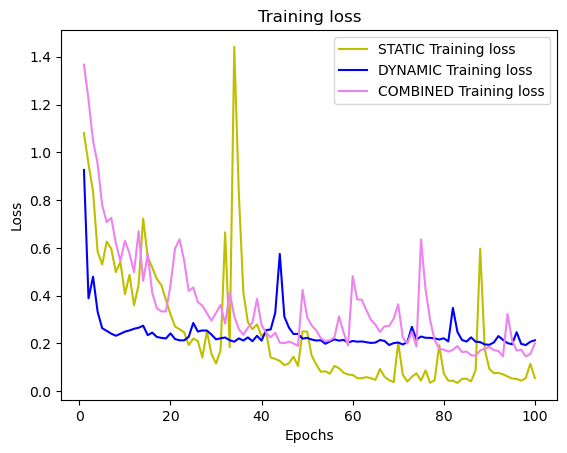

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

loss_static = history_static.history['loss']
loss_dynamic = history_dynamic.history['loss']
loss_combined = history_combined.history['loss']
epochs = range(1, len(loss_static) + 1)
plt.plot(epochs, loss_static, 'y', label='STATIC Training loss')
plt.plot(epochs, loss_dynamic, 'b', label='DYNAMIC Training loss')
plt.plot(epochs, loss_combined, color='violet', label='COMBINED Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

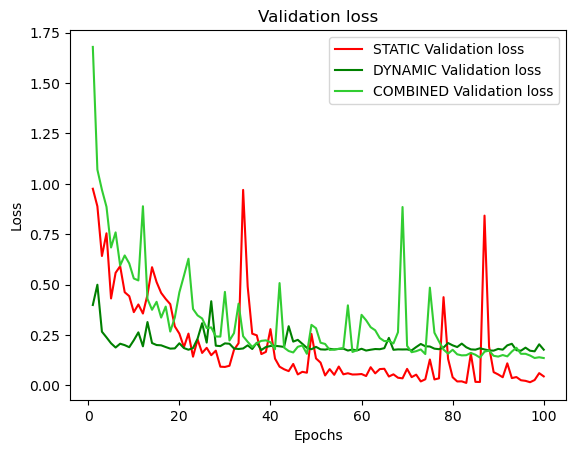

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

val_loss_static = history_static.history['val_loss']
val_loss_dynamic = history_dynamic.history['val_loss']
val_loss_combined = history_combined.history['val_loss']
epochs = range(1, len(loss_static) + 1)
plt.plot(epochs, val_loss_static, 'r', label='STATIC Validation loss')
plt.plot(epochs, val_loss_dynamic, 'g', label='DYNAMIC Validation loss')
plt.plot(epochs, val_loss_combined, color='limegreen', label='COMBINED Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

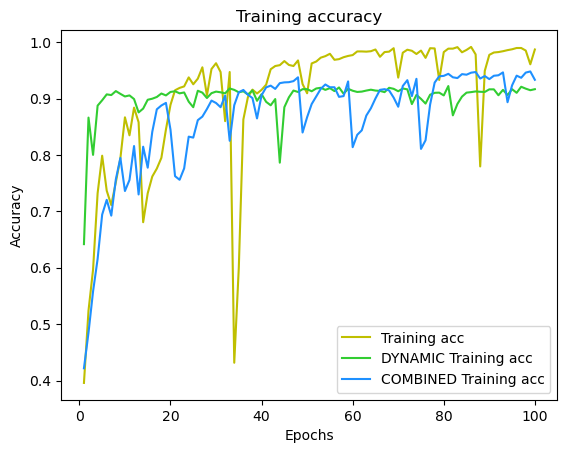

In [37]:
acc_static = history_static.history['accuracy']
acc_dynamic = history_dynamic.history['accuracy']
acc_combined = history_combined.history['accuracy']

plt.plot(epochs, acc_static, 'y', label='Training acc')
plt.plot(epochs, acc_dynamic, color='limegreen', label='DYNAMIC Training acc')
plt.plot(epochs, acc_combined, color='dodgerblue', label='COMBINED Training acc')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

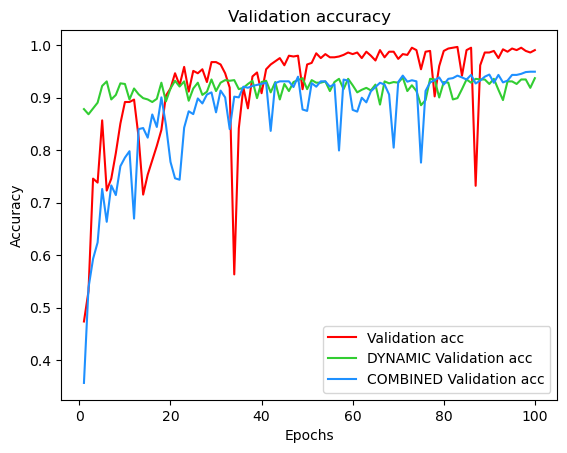

In [38]:
val_acc_static = history_static.history['val_accuracy']
val_acc_dynamic = history_dynamic.history['val_accuracy']
val_acc_combined = history_combined.history['val_accuracy']

plt.plot(epochs, val_acc_static, 'r', label='Validation acc')
plt.plot(epochs, val_acc_dynamic, color='limegreen', label='DYNAMIC Validation acc')
plt.plot(epochs, val_acc_combined, color='dodgerblue', label="COMBINED Validation acc")

plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

44/44 [==============================] - 1s 7ms/step
[[475   1  20]
 [ 48 396  27]
 [  4   1 415]]
0.9271809661139149
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       496
           1       0.99      0.84      0.91       471
           2       0.90      0.99      0.94       420

    accuracy                           0.93      1387
   macro avg       0.93      0.93      0.93      1387
weighted avg       0.93      0.93      0.93      1387



<Axes: >

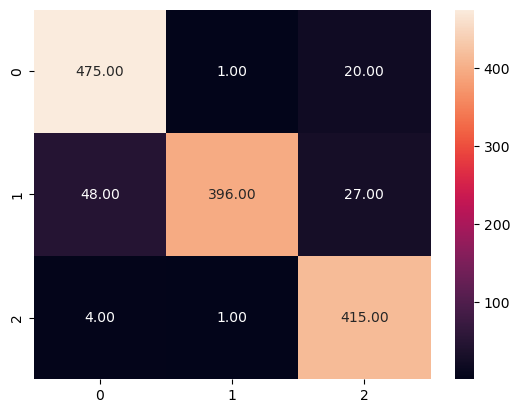

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred_static=model_static.predict(testX_static)
pred_static=np.argmax(pred_static, axis=-1)
cm_static=confusion_matrix(testy_static,pred_static)
print(cm_static)
print(accuracy_score(testy_static,pred_static))
print(classification_report(testy_static,pred_static))
sns.heatmap(cm_static, annot=True, fmt = '.2f')

49/49 [==============================] - 1s 8ms/step
[[382 109   0]
 [ 77 455   0]
 [  0  27 510]]
0.8634615384615385
              precision    recall  f1-score   support

           3       0.83      0.78      0.80       491
           4       0.77      0.86      0.81       532
           5       1.00      0.95      0.97       537

    accuracy                           0.86      1560
   macro avg       0.87      0.86      0.86      1560
weighted avg       0.87      0.86      0.86      1560



<Axes: >

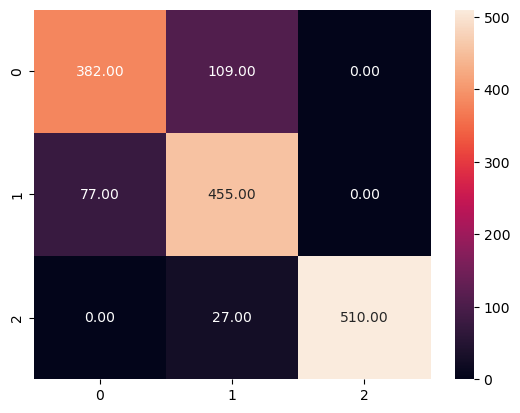

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred_dynamic=LSTM_model_dynamic.predict(testX_dynamic)
pred_dynamic=np.argmax(pred_dynamic, axis=-1)
cm_dynamic=confusion_matrix(testy_dynamic,pred_dynamic)
print(cm_dynamic)
print(accuracy_score(testy_dynamic,pred_dynamic))
print(classification_report(testy_dynamic,pred_dynamic))
sns.heatmap(cm_dynamic, annot=True, fmt = '.2f')

93/93 [==============================] - 1s 8ms/step
[[483   0  12   0   1   0]
 [ 43 406  22   0   0   0]
 [  8  19 393   0   0   0]
 [  1   0   0 392  98   0]
 [  0   0   0  99 433   0]
 [  0  24   3   0   0 510]]
0.8880217170003394
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       496
           1       0.90      0.86      0.88       471
           2       0.91      0.94      0.92       420
           3       0.80      0.80      0.80       491
           4       0.81      0.81      0.81       532
           5       1.00      0.95      0.97       537

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947



<Axes: >

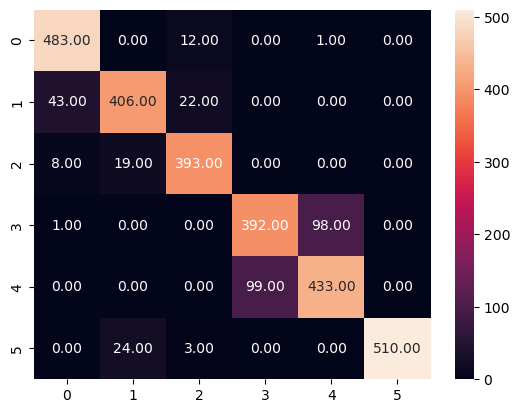

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred_combined=LSTM_model_combined.predict(testX_combined)
pred_combined=np.argmax(pred_combined, axis=-1)
cm_combined=confusion_matrix(testy_combined,pred_combined)
print(cm_combined)
print(accuracy_score(testy_combined,pred_combined))
print(classification_report(testy_combined,pred_combined))
sns.heatmap(cm_combined, annot=True, fmt = '.2f')

In [42]:
testX_static.shape, testy_static.shape, testX_combined.shape, testy_combined.shape

((1387, 128, 6), (1387, 1), (2947, 128, 6), (2947, 1))

In [43]:
score_static = model_static.evaluate(testX_static, testy_static_one_hot)
score_dynamic = LSTM_model_dynamic.evaluate(testX_dynamic, testy_dynamic_one_hot)
score_combined = LSTM_model_combined.evaluate(testX_combined, testy_combined_one_hot)

pd.DataFrame(score_static)

93/93 [==============================] - 1s 8ms/step - loss: 0.4610 - accuracy: 0.8880


,0
0,0.464664
1,0.927181
